In [21]:
# This is query for the Gini Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [5]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/gini/"

In [45]:
def extractorYear(year):
    return(int(str(year)[:4]))

In [46]:
def extractorWeek(year):
    return(int(str(year)[4:]))

In [6]:
all_files = glob.glob(path + "/*/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [53]:
new_df["year"]=new_df.year_week.apply(extractorYear)
new_df["week"]=new_df.year_week.apply(extractorWeek)
final = new_df.sort_values(by=['year','week'])

<AxesSubplot: xlabel='date'>

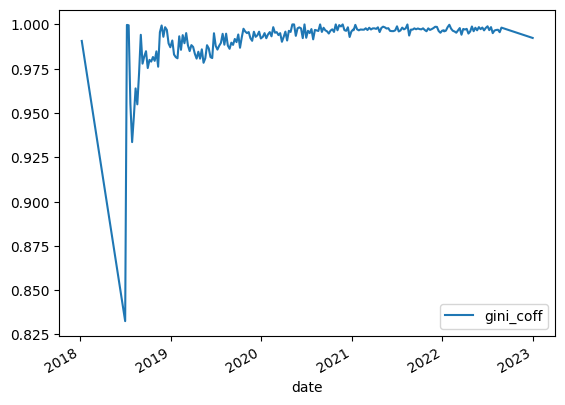

In [52]:
# Determine the date
final['date'] = pd.to_datetime(final.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(final.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
final.plot(x='date', y='gini_coff', ax=ax)